In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## 1. Clustering with the **Iris** Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
#change column names to a cleaner look
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [4]:
#starting w/ 2 features
X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [5]:
#Scale the X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


### b. Visualize the results of your clustering.

In [7]:
#define the thing
kmeans = KMeans(n_clusters=3)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [8]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [9]:
X_scaled.head()

,sepal_width,petal_width,cluster
1,1.019004,-1.315444,0
2,-0.131979,-1.315444,0
3,0.328414,-1.315444,0
4,0.098217,-1.315444,0
5,1.249201,-1.315444,0


In [10]:
X_scaled.sample(10)

,sepal_width,petal_width,cluster
70,-1.282963,-0.130755,1
63,-1.973554,-0.262387,1
138,0.098217,0.790671,2
126,0.328414,0.790671,2
92,-0.131979,0.264142,2
95,-0.822570,0.132510,1
117,-0.131979,0.790671,2
21,0.788808,-1.315444,0
115,-0.592373,1.580464,2
113,-0.131979,1.185567,2


In [11]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [-1.04776227,  0.18974112],
       [ 0.06891952,  0.96059584]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.047762,0.189741
2,0.068920,0.960596


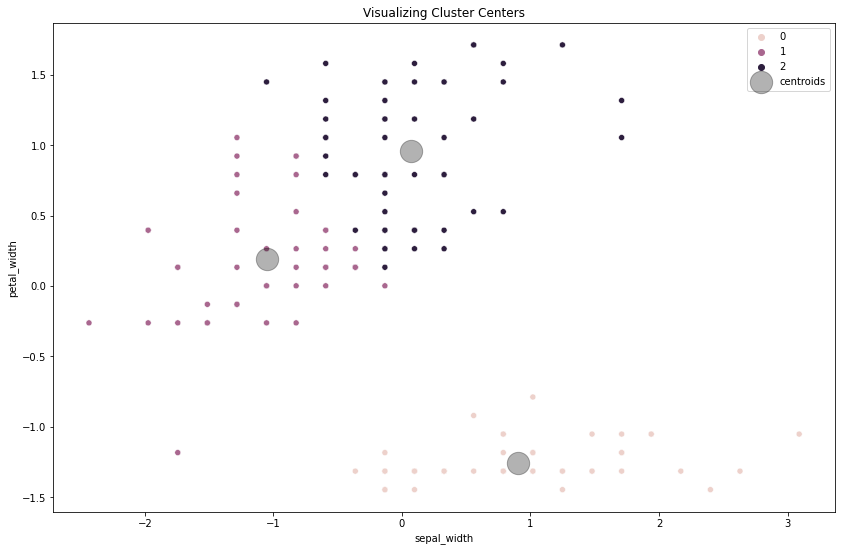

In [13]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='sepal_width', 
                y='petal_width', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='sepal_width', 
                              y='petal_width', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [14]:
#to make colors different(more contrasting): pass on a string
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster
1,1.019004,-1.315444,cluster_0
2,-0.131979,-1.315444,cluster_0
3,0.328414,-1.315444,cluster_0
4,0.098217,-1.315444,cluster_0
5,1.249201,-1.315444,cluster_0


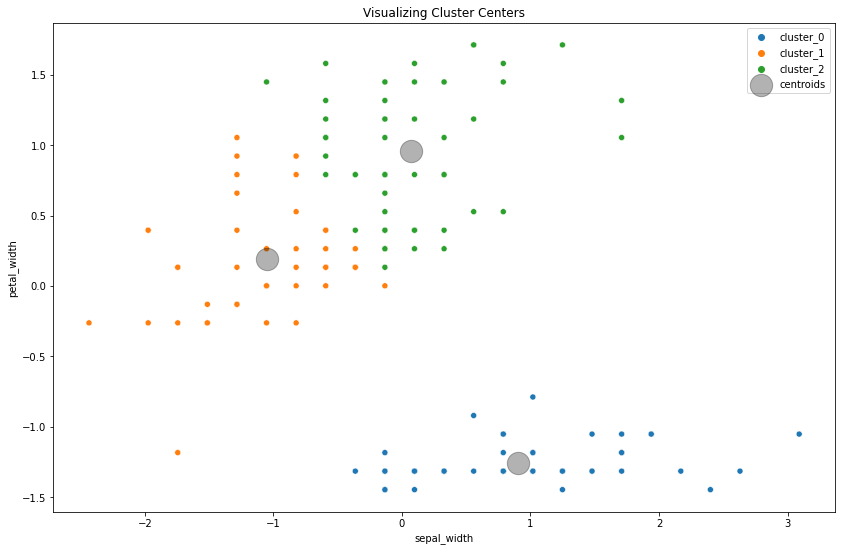

In [15]:
#rerun plot to get new colors on scaled data
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='sepal_width', 
                y='petal_width', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='sepal_width', 
                              y='petal_width', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k.

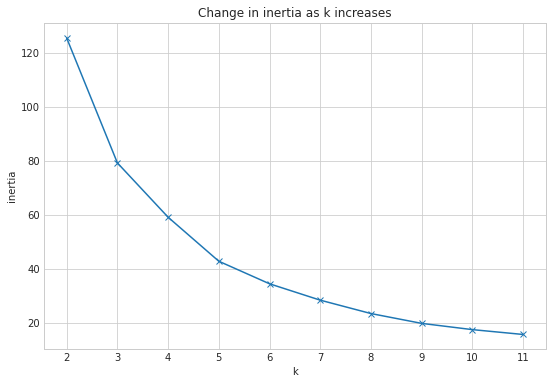

In [16]:
#start from scratch
X = iris[['sepal_width', 'petal_width']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])


#plot inertia vs k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

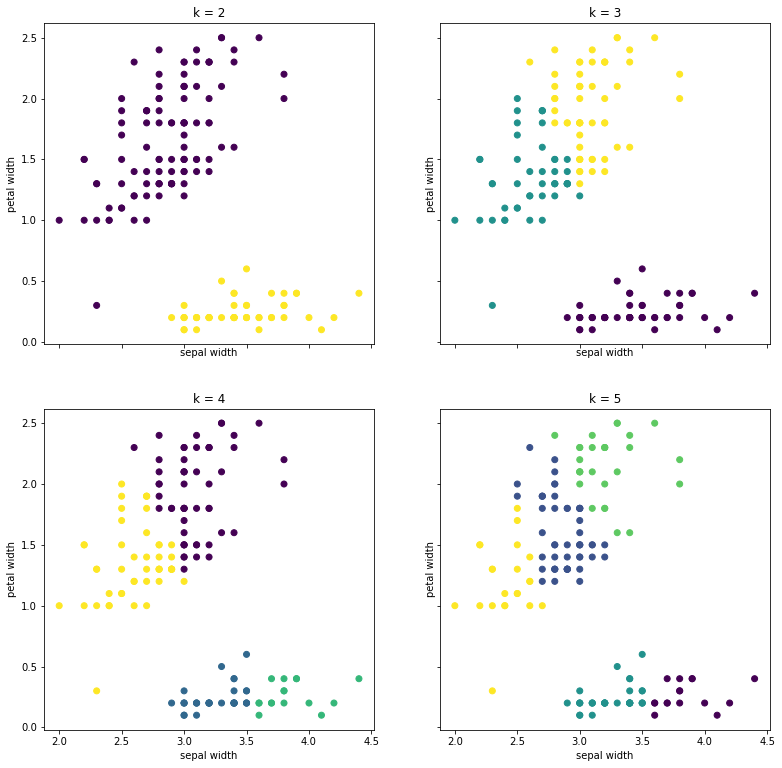

In [17]:
# What value of k is appropriate?
# can also visualize clusters

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')


### d. Repeat the clustering, this time with 3 different features.

In [18]:
#creating new feature for sepal area:
iris["sepal_area"] = iris.sepal_length * iris.sepal_width

In [19]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
1,5.1,3.5,1.4,0.2,setosa,17.85
2,4.9,3.0,1.4,0.2,setosa,14.70
3,4.7,3.2,1.3,0.2,setosa,15.04


In [20]:
#same process w/ 3 features this time
X = iris[['petal_width', 'petal_length', 'sepal_area']]

X.head()

,petal_width,petal_length,sepal_area
1,0.2,1.4,17.85
2,0.2,1.4,14.70
3,0.2,1.3,15.04
4,0.2,1.5,14.26
5,0.2,1.4,18.00


In [21]:
#Scale the X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,petal_width,petal_length,sepal_area
1,-1.315444,-1.340227,0.008098
2,-1.315444,-1.340227,-0.932024
3,-1.315444,-1.397064,-0.830551
4,-1.315444,-1.283389,-1.063343
5,-1.315444,-1.340227,0.052866


In [22]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

In [23]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,petal_width,petal_length,sepal_area,cluster
1,-1.315444,-1.340227,0.008098,2
2,-1.315444,-1.340227,-0.932024,0
3,-1.315444,-1.397064,-0.830551,0
4,-1.315444,-1.283389,-1.063343,0
5,-1.315444,-1.340227,0.052866,2


In [24]:
X_scaled.sample(10)

,petal_width,petal_length,sepal_area,cluster
29,-1.315444,-1.340227,-0.042639,2
6,-1.052180,-1.169714,0.966127,2
107,0.659038,0.421734,-1.663230,3
77,0.264142,0.592246,0.363255,3
126,0.790671,1.274295,1.557061,1
20,-1.183812,-1.283389,0.464729,2
68,-0.262387,0.194384,-0.645511,3
28,-1.315444,-1.283389,0.112556,2
81,-0.130755,0.023872,-1.379701,3
7,-1.183812,-1.340227,-0.651480,0


In [25]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[-1.28911786, -1.31976505, -0.85108407],
       [ 1.0478126 ,  1.01257859,  1.03442395],
       [-1.22066912, -1.29020959,  0.51379413],
       [ 0.31032865,  0.38085065, -0.63242073]])

In [26]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,petal_width,petal_length,sepal_area
0,-1.289118,-1.319765,-0.851084
1,1.047813,1.012579,1.034424
2,-1.220669,-1.290210,0.513794
3,0.310329,0.380851,-0.632421


In [27]:
#pass on a string for contrasting colors
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,petal_width,petal_length,sepal_area,cluster
1,-1.315444,-1.340227,0.008098,cluster_2
2,-1.315444,-1.340227,-0.932024,cluster_0
3,-1.315444,-1.397064,-0.830551,cluster_0
4,-1.315444,-1.283389,-1.063343,cluster_0
5,-1.315444,-1.340227,0.052866,cluster_2


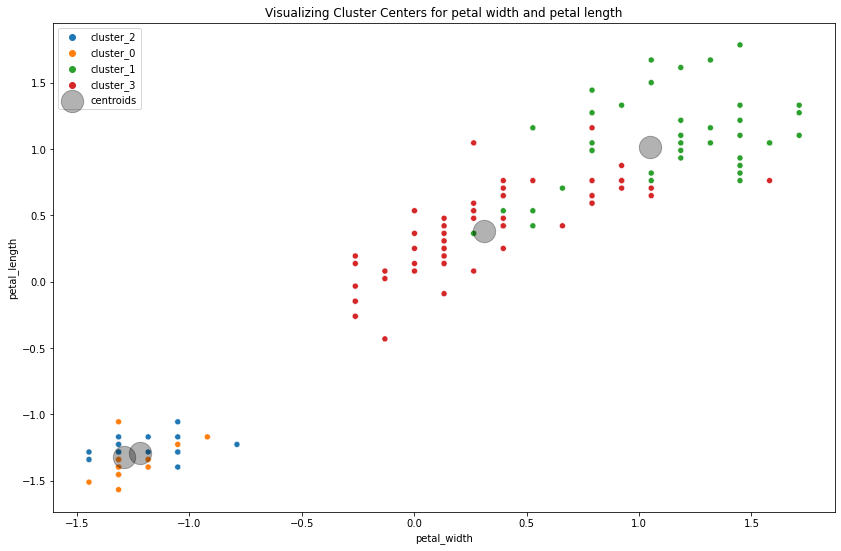

In [28]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_width', 
                y='petal_length', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', 
                              y='petal_length', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal width and petal length')
plt.legend();

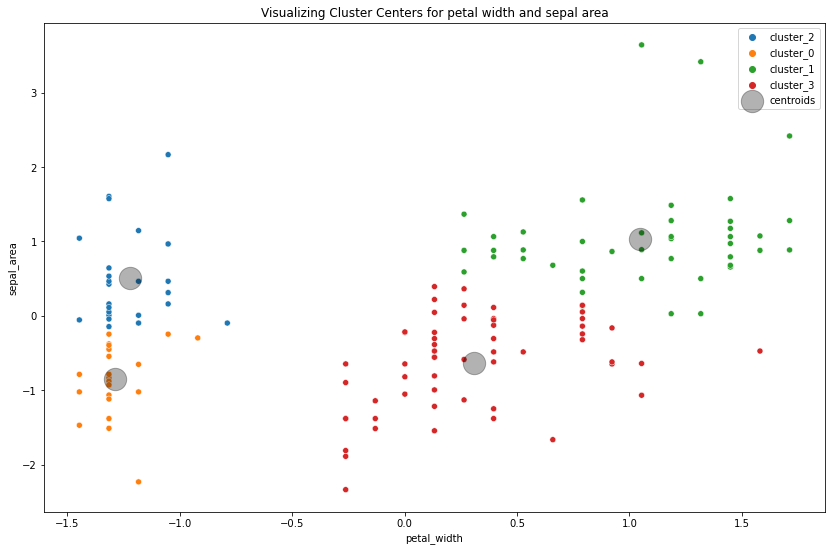

In [29]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_width', 
                y='sepal_area', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', 
                              y='sepal_area', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal width and sepal area')
plt.legend();

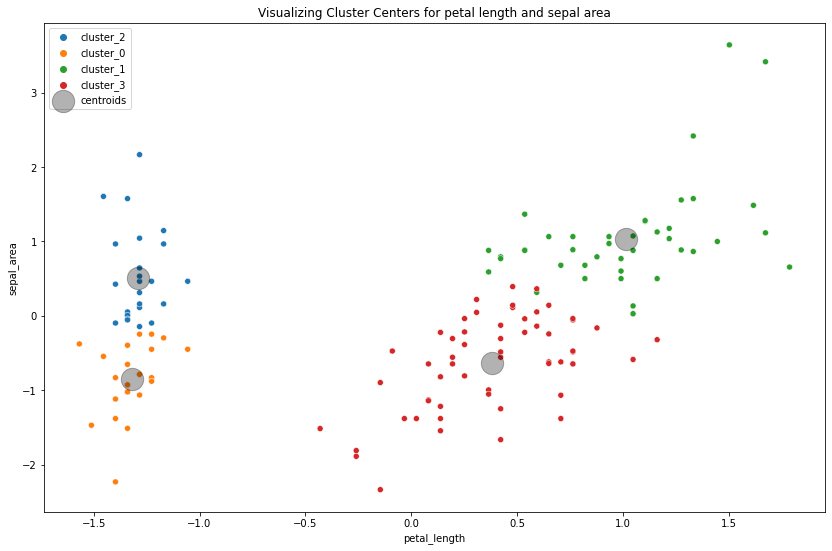

In [30]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_length', 
                y='sepal_area', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_length', 
                              y='sepal_area', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal length and sepal area')
plt.legend();

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the **mall** customers dataset. Be sure to visualize your results!

In [31]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

df = get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [32]:
df.shape

(200, 4)

In [33]:
#start w/ 2 features
X = df[['age', 'spending_score']]
X.head()

,age,spending_score
customer_id,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40


In [34]:
#scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,age,spending_score
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980


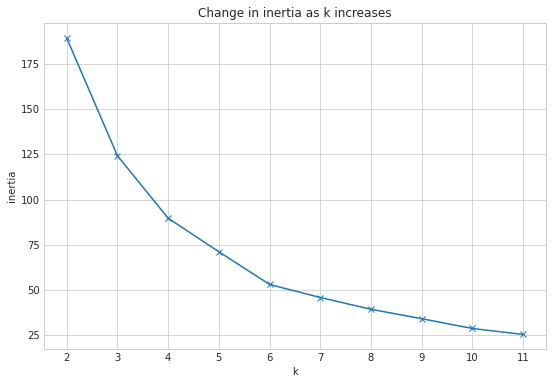

In [35]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

- elbow method shows good cluster to use is either 4 or 5

In [36]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 3, 2, 2, 2, 3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       0, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

In [37]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,age,spending_score,cluster
1,-1.424569,-0.434801,2
2,-1.281035,1.195704,0
3,-1.352802,-1.715913,2
4,-1.137502,1.040418,0
5,-0.563369,-0.395980,2


In [38]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894],
       [-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366]])

In [39]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,age,spending_score
0,-0.614157,1.149715
1,0.628336,-1.366519
2,-0.834647,-0.394427
3,1.229272,-0.065584


In [40]:
#pass on a string for contrasting colors
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,age,spending_score,cluster
1,-1.424569,-0.434801,cluster_2
2,-1.281035,1.195704,cluster_0
3,-1.352802,-1.715913,cluster_2
4,-1.137502,1.040418,cluster_0
5,-0.563369,-0.395980,cluster_2


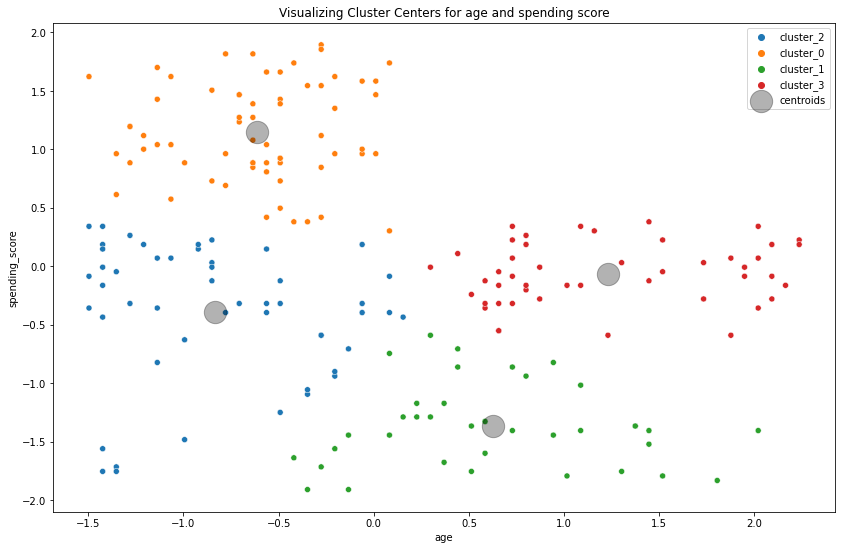

In [42]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='age', 
                y='spending_score', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='age', 
                              y='spending_score', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for age and spending score')
plt.legend();

## 3. How does scaling impact the results of clustering?Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [50]:
#restart w/ 2 features and show unscaled
X = df[['age', 'spending_score']]
X.head()

,age,spending_score
customer_id,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40


In [51]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X) 

# Use (predict using) the thing 
kmeans.predict(X)

array([2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [52]:
X['cluster'] = kmeans.predict(X)
X.head()

,age,spending_score,cluster
customer_id,,,
1,19,39,2
2,21,81,1
3,20,6,3
4,23,77,1
5,31,40,2


In [53]:
#centroids for unscaled data
centroids = df.groupby('cluster')['age', 'spending_score'].mean()
centroids

,age,spending_score
cluster,,
0,28.068966,72.367816
3,47.150442,33.132743


In [54]:
#pass on a string for contrasting colors
X['cluster'] = 'cluster_' + X.cluster.astype(str)
X.head()

,age,spending_score,cluster
customer_id,,,
1,19,39,cluster_2
2,21,81,cluster_1
3,20,6,cluster_3
4,23,77,cluster_1
5,31,40,cluster_2


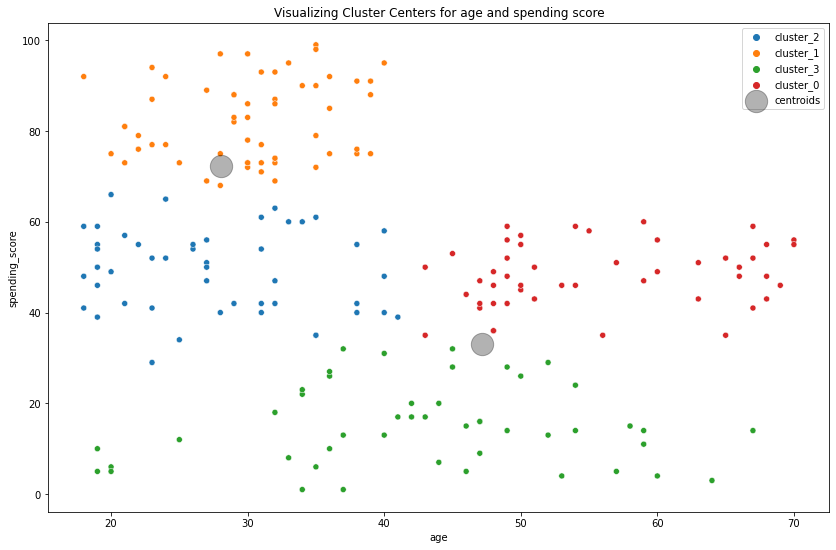

In [55]:
#visualize the clusters along with the centers on unscaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='age', 
                y='spending_score', 
                data=X, 
                hue='cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x='age', 
                              y='spending_score', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for age and spending score')
plt.legend();